In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 1: Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')
train_df
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

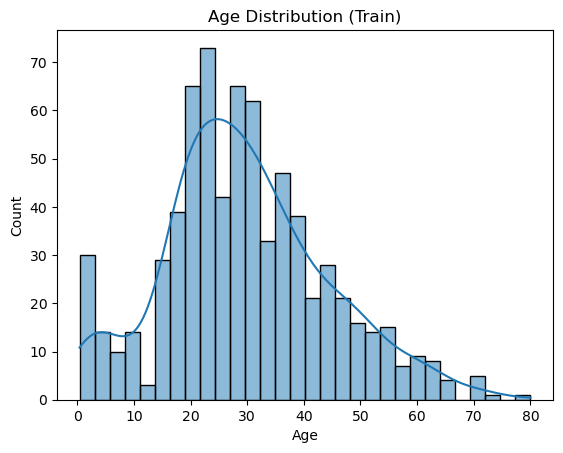

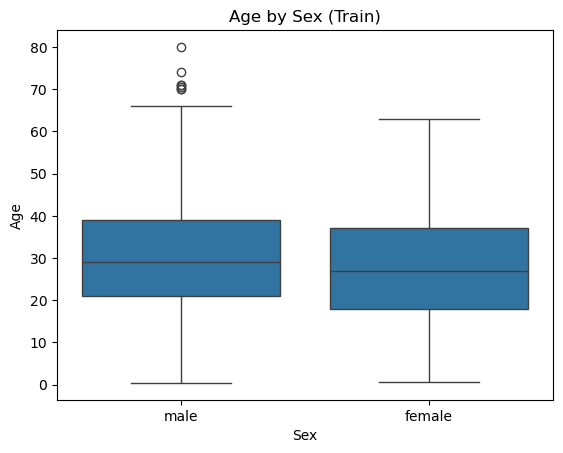

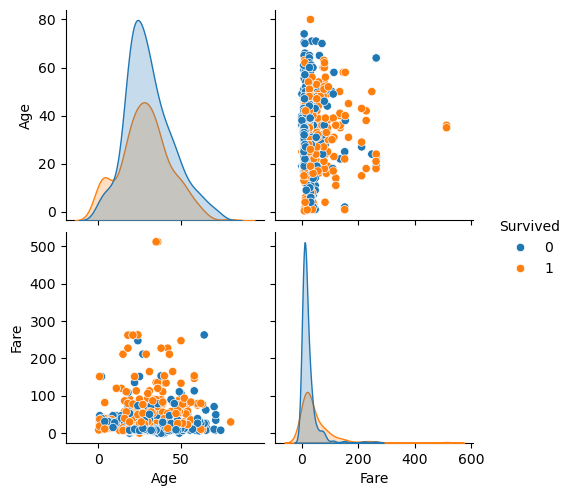

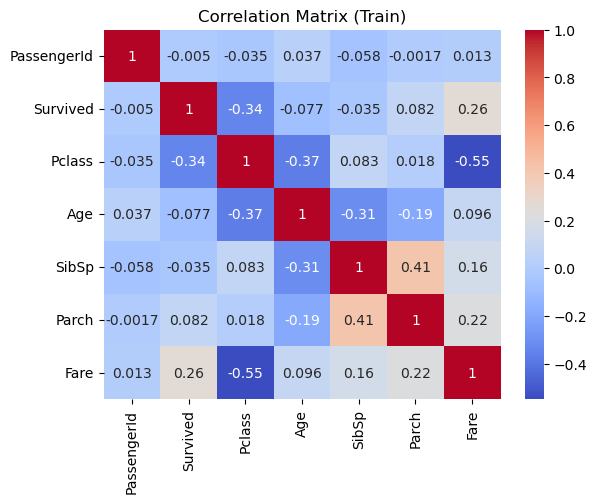

In [3]:
# Step 2: Data Exploration (on train_df)
print(train_df.info())
print(train_df.describe())
print(train_df.describe(include=['O']))

sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution (Train)')
plt.show()

sns.boxplot(x='Sex', y='Age', data=train_df)
plt.title('Age by Sex (Train)')
plt.show()

sns.pairplot(train_df, vars=['Age', 'Fare'], hue='Survived')
plt.show()

corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Train)')
plt.show()

In [4]:
# Step 3: Data Preprocessing (on both datasets)
for df in [train_df, test_df]:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    le_sex = LabelEncoder()
    le_embarked = LabelEncoder()
    df['Sex'] = le_sex.fit_transform(df['Sex'])
    df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# drop columns not used for modeling
columns_to_drop = ['PassengerId','Name','Ticket','Cabin']
train_df.drop(columns=columns_to_drop, inplace=True)
test_passenger_ids = test_df['PassengerId']  # Save for submission/prediction output
test_df.drop(columns=columns_to_drop, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_35548\3965972835.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_35548\3965972835.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
# Step 4: Model Building
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df  # test_df usually does not have 'Survived' column

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC: 0.8823680823680824


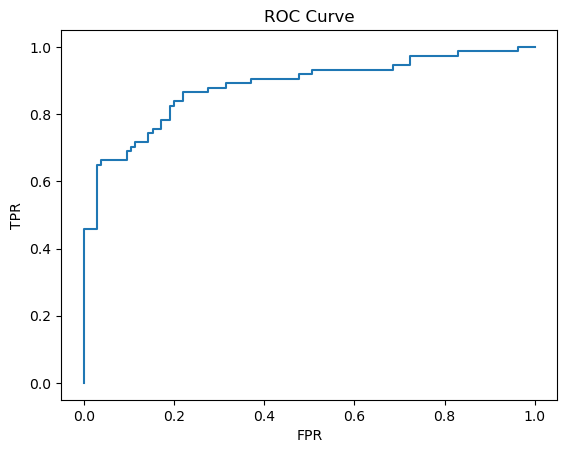

In [6]:
# Step 5: Model Evaluation (Evaluate using train split, or reserve a part for validation)
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model_eval = LogisticRegression(max_iter=1000)
model_eval.fit(X_tr, y_tr)
y_val_pred = model_eval.predict(X_val)
y_val_proba = model_eval.predict_proba(X_val)[:, 1]

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba))

fpr, tpr, threshold = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [7]:
# Step 6: Predict on Titanic_test.csv
test_pred = model.predict(X_test)

# Step 7: Output prediction (for Kaggle, combine with PassengerId)
output = pd.DataFrame({'PassengerId': test_passenger_ids, 'Survived': test_pred})
output.to_csv('submission.csv', index=False)
print(output.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [8]:
import joblib
joblib.dump(model, 'logistic_model.pkl')


['logistic_model.pkl']